In [10]:
""" from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.cluster import KMeans
import pandas as pd
import numpy as np

# Assuming you have a DataFrame data with columns 'Extracted_keyword' and 'field_of_study'
# Example: data = pd.read_csv('your_file.csv')
input_file = "data_chula.csv"  # Replace with your CSV file path
data = pd.read_csv(input_file)
# Prepare the TfidfVectorizer with ngram_range to capture bigrams or trigrams
vectorizer = TfidfVectorizer(ngram_range=(1, 2))  # (1, 2) captures unigrams and bigrams

# Apply KMeans clustering for each field of study
field_of_study_list = data["subjectArea"].unique()  # List of unique fields of study

# Create a dictionary to store the clustering results by field of study
field_clustering_results = {}

for field in field_of_study_list:
    # Filter the data for the current field of study
    field_data = data[data["subjectArea"] == field]
    
    # Prepare the text data for TF-IDF
    sentences = field_data["extracted_keywords"]
    
    # Compute the TF-IDF matrix
    tfidf_matrix = vectorizer.fit_transform(sentences)
    
    # Apply KMeans clustering (choose the number of clusters)
    num_clusters = 5  # You can modify this depending on your data
    kmeans = KMeans(n_clusters=num_clusters, random_state=42)
    kmeans.fit(tfidf_matrix)
    
    # Add the cluster labels to the DataFrame for the current field of study
    field_data['cluster'] = kmeans.labels_
    
    # Identify the largest cluster by size
    largest_cluster = np.argmax(np.bincount(kmeans.labels_))
    
    # Get the indices of the largest cluster
    largest_cluster_indices = np.where(kmeans.labels_ == largest_cluster)[0]
    
    # Find the centroid of the largest cluster
    centroid = kmeans.cluster_centers_[largest_cluster]
    
    # Get the top keywords of the centroid (sorted by their importance)
    top_keywords_indices = centroid.argsort()[-10:][::-1]  # Top 10 keywords
    top_keywords = [vectorizer.get_feature_names_out()[i] for i in top_keywords_indices]
    
    # Store the results in the dictionary
    field_clustering_results[field] = {
        'top_keywords': top_keywords,
        'field_data': field_data,
        'largest_cluster': largest_cluster,
        'cluster_centroids': kmeans.cluster_centers_
    }

# Print the top keywords for each field of study
for field, results in field_clustering_results.items():
    print(f"Field of Study: {field}")
    print(f"Top Keywords: {results['top_keywords']}")
    print() """

' from sklearn.feature_extraction.text import TfidfVectorizer\nfrom sklearn.cluster import KMeans\nimport pandas as pd\nimport numpy as np\n\n# Assuming you have a DataFrame data with columns \'Extracted_keyword\' and \'field_of_study\'\n# Example: data = pd.read_csv(\'your_file.csv\')\ninput_file = "data_chula.csv"  # Replace with your CSV file path\ndata = pd.read_csv(input_file)\n# Prepare the TfidfVectorizer with ngram_range to capture bigrams or trigrams\nvectorizer = TfidfVectorizer(ngram_range=(1, 2))  # (1, 2) captures unigrams and bigrams\n\n# Apply KMeans clustering for each field of study\nfield_of_study_list = data["subjectArea"].unique()  # List of unique fields of study\n\n# Create a dictionary to store the clustering results by field of study\nfield_clustering_results = {}\n\nfor field in field_of_study_list:\n    # Filter the data for the current field of study\n    field_data = data[data["subjectArea"] == field]\n    \n    # Prepare the text data for TF-IDF\n    senten

In [3]:
from gensim.models import Word2Vec
import gensim.downloader as api
wv = api.load('word2vec-google-news-300')


[==================================================] 100.0% 1662.8/1662.8MB downloaded


In [138]:
import pandas as pd
import numpy as np

def toVector(word):
    try:
        l = list(wv[word])
        float_list = [float(num) for num in l]
        return float_list
    except:
        return None

df = pd.read_csv('merged_data_withkeywords.csv')
df['vector'] = df['One_keyword'].apply(lambda x: toVector(x))

df


,title,publicationName,abstract,keywords,subjectArea,publication_date,combined,processed,Top_Three_Keywords,One_keyword,vector
0,Effects of iron content on the microstructure ...,Materials Chemistry and Physics,© 2018The microstructure and corrosion behavio...,"EIS,Microstructure,Pitting corrosion,Polarizat...","MATE,PHYS",01/10/2018,Effects of iron content on the microstructure ...,effects iron content microstructure corrosion ...,"alloys, corrosion, exhibit",alloys,"[-0.05322265625, 0.5625, 0.33984375, 0.0639648..."
1,The critical factors of research and innovatio...,International Journal of Trade and Global Markets,Copyright © 2018 Inderscience Enterprises Ltd....,"Critical factors,Innovation creation,Public un...","BUSI,ECON",01/01/2018,The critical factors of research and innovatio...,critical factors research innovation creation ...,"universities, creation, innovation",universities,"[-0.078125, -0.0003509521484375, 0.2412109375,..."
2,Is the occiput-wall distance valid and reliabl...,Musculoskeletal Science and Practice,© 2018Background: Hyperkyphosis may be frequen...,"Cobb angle,Dowager's hump,Round back,Spine",HEAL,01/12/2018,Is the occiput-wall distance valid and reliabl...,occiput-wall distance valid reliable determine...,"hyperkyphosis, owd, thoracic",hyperkyphosis,None
3,Comparison of soil composition between farmlan...,Eurasian Journal of Analytical Chemistry,© 2018 Society for Innovative Research. All ri...,"Agriculture land management,Conserved area,Soi...","PHAR,CHEM",01/01/2018,Comparison of soil composition between farmlan...,comparison soil composition farmlands conserve...,"farmlands, soils, conserved",farmlands,"[0.37109375, 0.33984375, 0.1455078125, -0.0898..."
4,The impact of wire caliber on ERCP outcomes: a...,Gastrointestinal Endoscopy,© 2018Background and Aims: Wire-guided biliary...,NaN,MEDI,01/06/2018,The impact of wire caliber on ERCP outcomes: a...,impact wire caliber ercp outcomes multicenter ...,"inch, cannulation, wire",inch,"[-0.30078125, 0.07373046875, 0.09716796875, -0..."
...,...,...,...,...,...,...,...,...,...,...,...
22601,A SOM-Based Trajectory Planning Analysis Metho...,SAE Technical Papers,NaN,NaN,ENGI,31/12/2023,A SOM-Based Trajectory Planning Analysis Metho...,som-based trajectory planning analysis method ...,"som, trajectory, intelligent",som,"[-0.10107421875, -0.279296875, 0.0206298828125..."
22602,Overview and Research on Airworthiness and Saf...,SAE Technical Papers,NaN,NaN,"ENGI,MEDI",31/12/2023,Overview and Research on Airworthiness and Saf...,overview research airworthiness safety electri...,"airworthiness, propulsion, evtol",airworthiness,"[-0.66796875, -0.248046875, 0.158203125, -0.09..."
22603,Aeroengine Gas Path Parameter Trend Prediction...,SAE Technical Papers,NaN,NaN,ENGI,31/12/2023,Aeroengine Gas Path Parameter Trend Prediction...,aeroengine gas path parameter trend prediction...,"aeroengine, lstm, path",aeroengine,"[-0.1962890625, 0.06982421875, -0.022338867187..."
22604,A Wind Tunnel Investigation on the Aerodynamic...,SAE Technical Papers,NaN,NaN,ENGI,31/12/2023,A Wind Tunnel Investigation on the Aerodynamic...,wind tunnel investigation aerodynamics propuls...,"aerodynamics, propulsion, evtol",aerodynamics,"[0.330078125, 0.283203125, 0.248046875, -0.118..."


In [139]:
df.dropna(subset=['vector'], inplace=True)

df

,title,publicationName,abstract,keywords,subjectArea,publication_date,combined,processed,Top_Three_Keywords,One_keyword,vector
0,Effects of iron content on the microstructure ...,Materials Chemistry and Physics,© 2018The microstructure and corrosion behavio...,"EIS,Microstructure,Pitting corrosion,Polarizat...","MATE,PHYS",01/10/2018,Effects of iron content on the microstructure ...,effects iron content microstructure corrosion ...,"alloys, corrosion, exhibit",alloys,"[-0.05322265625, 0.5625, 0.33984375, 0.0639648..."
1,The critical factors of research and innovatio...,International Journal of Trade and Global Markets,Copyright © 2018 Inderscience Enterprises Ltd....,"Critical factors,Innovation creation,Public un...","BUSI,ECON",01/01/2018,The critical factors of research and innovatio...,critical factors research innovation creation ...,"universities, creation, innovation",universities,"[-0.078125, -0.0003509521484375, 0.2412109375,..."
3,Comparison of soil composition between farmlan...,Eurasian Journal of Analytical Chemistry,© 2018 Society for Innovative Research. All ri...,"Agriculture land management,Conserved area,Soi...","PHAR,CHEM",01/01/2018,Comparison of soil composition between farmlan...,comparison soil composition farmlands conserve...,"farmlands, soils, conserved",farmlands,"[0.37109375, 0.33984375, 0.1455078125, -0.0898..."
4,The impact of wire caliber on ERCP outcomes: a...,Gastrointestinal Endoscopy,© 2018Background and Aims: Wire-guided biliary...,NaN,MEDI,01/06/2018,The impact of wire caliber on ERCP outcomes: a...,impact wire caliber ercp outcomes multicenter ...,"inch, cannulation, wire",inch,"[-0.30078125, 0.07373046875, 0.09716796875, -0..."
5,The influence of neighbor effect and urbanizat...,Progress in Transplantation,"© 2017, NATCO. All rights reserved.Introductio...","Choice,Consumer wellness,Decision-making,Neigh...",MEDI,01/03/2018,The influence of neighbor effect and urbanizat...,influence neighbor effect urbanization toward ...,"donation, organ, neighbor",donation,"[0.028564453125, -0.146484375, -0.126953125, 0..."
...,...,...,...,...,...,...,...,...,...,...,...
22599,Research on Switchable Energy-Regenerative Sus...,SAE Technical Papers,NaN,NaN,"ENGI,ENER",31/12/2023,Research on Switchable Energy-Regenerative Sus...,research switchable energy-regenerative suspen...,"switchable, regenerative, suspension",switchable,"[0.0791015625, -0.029296875, -0.1728515625, -0..."
22601,A SOM-Based Trajectory Planning Analysis Metho...,SAE Technical Papers,NaN,NaN,ENGI,31/12/2023,A SOM-Based Trajectory Planning Analysis Metho...,som-based trajectory planning analysis method ...,"som, trajectory, intelligent",som,"[-0.10107421875, -0.279296875, 0.0206298828125..."
22602,Overview and Research on Airworthiness and Saf...,SAE Technical Papers,NaN,NaN,"ENGI,MEDI",31/12/2023,Overview and Research on Airworthiness and Saf...,overview research airworthiness safety electri...,"airworthiness, propulsion, evtol",airworthiness,"[-0.66796875, -0.248046875, 0.158203125, -0.09..."
22603,Aeroengine Gas Path Parameter Trend Prediction...,SAE Technical Papers,NaN,NaN,ENGI,31/12/2023,Aeroengine Gas Path Parameter Trend Prediction...,aeroengine gas path parameter trend prediction...,"aeroengine, lstm, path",aeroengine,"[-0.1962890625, 0.06982421875, -0.022338867187..."


In [140]:
vector_expanded = pd.DataFrame(df['vector'].tolist(), index=df.index)
vector_expanded.columns = [f'vector{i}' for i in range(vector_expanded.shape[1])]
df_expanded = pd.concat([df.drop(columns=['vector']), vector_expanded], axis=1)
df_expanded

,title,publicationName,abstract,keywords,subjectArea,publication_date,combined,processed,Top_Three_Keywords,One_keyword,...,vector290,vector291,vector292,vector293,vector294,vector295,vector296,vector297,vector298,vector299
0,Effects of iron content on the microstructure ...,Materials Chemistry and Physics,© 2018The microstructure and corrosion behavio...,"EIS,Microstructure,Pitting corrosion,Polarizat...","MATE,PHYS",01/10/2018,Effects of iron content on the microstructure ...,effects iron content microstructure corrosion ...,"alloys, corrosion, exhibit",alloys,...,0.316406,0.064941,-0.190430,0.365234,-0.061768,-0.382812,-0.086426,0.267578,0.220703,-0.484375
1,The critical factors of research and innovatio...,International Journal of Trade and Global Markets,Copyright © 2018 Inderscience Enterprises Ltd....,"Critical factors,Innovation creation,Public un...","BUSI,ECON",01/01/2018,The critical factors of research and innovatio...,critical factors research innovation creation ...,"universities, creation, innovation",universities,...,-0.304688,-0.112305,-0.468750,0.300781,0.176758,0.010437,-0.073730,0.077637,-0.000713,0.150391
3,Comparison of soil composition between farmlan...,Eurasian Journal of Analytical Chemistry,© 2018 Society for Innovative Research. All ri...,"Agriculture land management,Conserved area,Soi...","PHAR,CHEM",01/01/2018,Comparison of soil composition between farmlan...,comparison soil composition farmlands conserve...,"farmlands, soils, conserved",farmlands,...,-0.511719,-0.202148,-0.257812,0.044678,0.053711,-0.053223,-0.376953,-0.176758,0.378906,-0.238281
4,The impact of wire caliber on ERCP outcomes: a...,Gastrointestinal Endoscopy,© 2018Background and Aims: Wire-guided biliary...,NaN,MEDI,01/06/2018,The impact of wire caliber on ERCP outcomes: a...,impact wire caliber ercp outcomes multicenter ...,"inch, cannulation, wire",inch,...,-0.056396,-0.164062,-0.232422,-0.119629,0.193359,-0.221680,-0.320312,0.037598,-0.098633,-0.184570
5,The influence of neighbor effect and urbanizat...,Progress in Transplantation,"© 2017, NATCO. All rights reserved.Introductio...","Choice,Consumer wellness,Decision-making,Neigh...",MEDI,01/03/2018,The influence of neighbor effect and urbanizat...,influence neighbor effect urbanization toward ...,"donation, organ, neighbor",donation,...,-0.208984,0.021362,-0.296875,-0.133789,0.353516,-0.164062,0.103027,0.021606,-0.172852,-0.224609
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
22599,Research on Switchable Energy-Regenerative Sus...,SAE Technical Papers,NaN,NaN,"ENGI,ENER",31/12/2023,Research on Switchable Energy-Regenerative Sus...,research switchable energy-regenerative suspen...,"switchable, regenerative, suspension",switchable,...,0.211914,0.396484,0.203125,0.199219,-0.062988,-0.015747,-0.139648,-0.077148,-0.106445,-0.115234
22601,A SOM-Based Trajectory Planning Analysis Metho...,SAE Technical Papers,NaN,NaN,ENGI,31/12/2023,A SOM-Based Trajectory Planning Analysis Metho...,som-based trajectory planning analysis method ...,"som, trajectory, intelligent",som,...,-0.011108,0.308594,0.163086,0.175781,0.108398,-0.055420,0.002991,0.105957,-0.131836,0.259766
22602,Overview and Research on Airworthiness and Saf...,SAE Technical Papers,NaN,NaN,"ENGI,MEDI",31/12/2023,Overview and Research on Airworthiness and Saf...,overview research airworthiness safety electri...,"airworthiness, propulsion, evtol",airworthiness,...,0.166016,0.040283,0.134766,0.091309,0.194336,0.093750,-0.326172,0.128906,0.154297,-0.441406
22603,Aeroengine Gas Path Parameter Trend Prediction...,SAE Technical Papers,NaN,NaN,ENGI,31/12/2023,Aeroengine Gas Path Parameter Trend Prediction...,aeroengine gas path parameter trend prediction...,"aeroengine, lstm, path",aeroengine,...,-0.107422,-0.045898,-0.104492,0.092285,0.163086,-0.052979,0.066895,0.160156,0.087402,-0.163086


In [141]:
df_expanded.to_csv("merged_data_withkeywords&vectors_dropNone", index=False)

In [52]:
df = pd.read_csv('merged_data_withkeywords&vectors_dropNone2.csv')
df

0        [-5.32226562e-02  5.62500000e-01  3.39843750e-...
1        [-7.81250000e-02 -3.50952148e-04  2.41210938e-...
2        [ 3.71093750e-01  3.39843750e-01  1.45507812e-...
3        [-0.30078125  0.07373047  0.09716797 -0.131835...
4        [ 0.02856445 -0.14648438 -0.12695312  0.205078...
                               ...                        
15136    [ 7.91015625e-02 -2.92968750e-02 -1.72851562e-...
15137    [-0.10107422 -0.27929688  0.02062988  0.097167...
15138    [-0.66796875 -0.24804688  0.15820312 -0.094238...
15139    [-1.96289062e-01  6.98242188e-02 -2.23388672e-...
15140    [ 0.33007812  0.28320312  0.24804688 -0.118652...
Name: vector, Length: 15141, dtype: object

In [3]:
df['subjectArea'].unique()

array(['MATE,PHYS', 'BUSI,ECON', 'PHAR,CHEM', 'MEDI', 'MULT,AGRI,BIOC',
       'MULT', 'PHYS', 'CENG', 'COMP,ENGI', 'SOCI,ENGI', 'VETE,AGRI',
       'ENGI,PHYS,COMP', 'ENGI', 'AGRI,EART,ENGI', 'ENGI,PHYS,COMP,DECI',
       'PHYS,ENER', 'NEUR,MEDI,BIOC', 'MATE,ENGI', 'CENG,SOCI,ENGI',
       'SOCI', 'MATH,COMP', 'ARTS,SOCI,BUSI,ECON', 'NEUR,MEDI',
       'CENG,ENER,ENVI,CHEM', 'NEUR,AGRI,BIOC', 'COMP', 'MATE,CHEM',
       'HEAL,AGRI,IMMU,SOCI', 'MATE,ENER,ENGI', 'PSYC', 'BIOC', 'MATH',
       'AGRI,BIOC', 'PHYS,EART', 'CENG,CHEM', 'PHAR,BIOC', 'MEDI,BIOC',
       'NEUR,PHAR,BIOC', 'AGRI,IMMU,BIOC', 'ENGI,COMP', 'CENG,MATE',
       'ENGI,MATH,COMP', 'SOCI,BUSI,ENGI,COMP,DECI', 'CENG,AGRI,CHEM',
       'IMMU,BIOC', 'ECON', 'BIOC,PHAR,CHEM', 'ENVI',
       'MATH,BUSI,ENGI,COMP,DECI', 'EART,SOCI,ENGI', 'CHEM', 'DENT,SOCI',
       'VETE', 'MEDI,AGRI,IMMU,BIOC', 'MEDI,SOCI,ENGI', 'DECI',
       'MEDI,SOCI,PHAR', 'DENT', 'MEDI,IMMU', 'MEDI,SOCI', 'EART',
       'PHYS,ENGI', 'NURS,MEDI', 'COMP,

In [ ]:
import pandas as pd
df = pd.read_csv('merged_data_withkeywords&vectors_dropNone.csv', low_memory=False)
df
    

,title,publicationName,abstract,keywords,subjectArea,publication_date,combined,processed,Top_Three_Keywords,One_keyword,...,vector290,vector291,vector292,vector293,vector294,vector295,vector296,vector297,vector298,vector299
0,Effects of iron content on the microstructure ...,Materials Chemistry and Physics,© 2018The microstructure and corrosion behavio...,"EIS,Microstructure,Pitting corrosion,Polarizat...","MATE,PHYS",01/10/2018,Effects of iron content on the microstructure ...,effects iron content microstructure corrosion ...,"alloys, corrosion, exhibit",alloys,...,0.316406,0.064941,-0.190430,0.365234,-0.061768,-0.382812,-0.086426,0.267578,0.220703,-0.484375
1,The critical factors of research and innovatio...,International Journal of Trade and Global Markets,Copyright © 2018 Inderscience Enterprises Ltd....,"Critical factors,Innovation creation,Public un...","BUSI,ECON",01/01/2018,The critical factors of research and innovatio...,critical factors research innovation creation ...,"universities, creation, innovation",universities,...,-0.304688,-0.112305,-0.468750,0.300781,0.176758,0.010437,-0.073730,0.077637,-0.000713,0.150391
2,Comparison of soil composition between farmlan...,Eurasian Journal of Analytical Chemistry,© 2018 Society for Innovative Research. All ri...,"Agriculture land management,Conserved area,Soi...","PHAR,CHEM",01/01/2018,Comparison of soil composition between farmlan...,comparison soil composition farmlands conserve...,"farmlands, soils, conserved",farmlands,...,-0.511719,-0.202148,-0.257812,0.044678,0.053711,-0.053223,-0.376953,-0.176758,0.378906,-0.238281
3,The impact of wire caliber on ERCP outcomes: a...,Gastrointestinal Endoscopy,© 2018Background and Aims: Wire-guided biliary...,NaN,MEDI,01/06/2018,The impact of wire caliber on ERCP outcomes: a...,impact wire caliber ercp outcomes multicenter ...,"inch, cannulation, wire",inch,...,-0.056396,-0.164062,-0.232422,-0.119629,0.193359,-0.221680,-0.320312,0.037598,-0.098633,-0.184570
4,The influence of neighbor effect and urbanizat...,Progress in Transplantation,"© 2017, NATCO. All rights reserved.Introductio...","Choice,Consumer wellness,Decision-making,Neigh...",MEDI,01/03/2018,The influence of neighbor effect and urbanizat...,influence neighbor effect urbanization toward ...,"donation, organ, neighbor",donation,...,-0.208984,0.021362,-0.296875,-0.133789,0.353516,-0.164062,0.103027,0.021606,-0.172852,-0.224609
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15136,Research on Switchable Energy-Regenerative Sus...,SAE Technical Papers,NaN,NaN,"ENGI,ENER",31/12/2023,Research on Switchable Energy-Regenerative Sus...,research switchable energy-regenerative suspen...,"switchable, regenerative, suspension",switchable,...,0.211914,0.396484,0.203125,0.199219,-0.062988,-0.015747,-0.139648,-0.077148,-0.106445,-0.115234
15137,A SOM-Based Trajectory Planning Analysis Metho...,SAE Technical Papers,NaN,NaN,ENGI,31/12/2023,A SOM-Based Trajectory Planning Analysis Metho...,som-based trajectory planning analysis method ...,"som, trajectory, intelligent",som,...,-0.011108,0.308594,0.163086,0.175781,0.108398,-0.055420,0.002991,0.105957,-0.131836,0.259766
15138,Overview and Research on Airworthiness and Saf...,SAE Technical Papers,NaN,NaN,"ENGI,MEDI",31/12/2023,Overview and Research on Airworthiness and Saf...,overview research airworthiness safety electri...,"airworthiness, propulsion, evtol",airworthiness,...,0.166016,0.040283,0.134766,0.091309,0.194336,0.093750,-0.326172,0.128906,0.154297,-0.441406
15139,Aeroengine Gas Path Parameter Trend Prediction...,SAE Technical Papers,NaN,NaN,ENGI,31/12/2023,Aeroengine Gas Path Parameter Trend Prediction...,aeroengine gas path parameter trend prediction...,"aeroengine, lstm, path",aeroengine,...,-0.107422,-0.045898,-0.104492,0.092285,0.163086,-0.052979,0.066895,0.160156,0.087402,-0.163086


In [8]:
from sklearn.cluster import KMeans
import numpy as np
df = pd.read_csv('merged_data_withkeywords&vectors_dropNone.csv', low_memory=False)
field_of_study= [
        "MEDI", "ENGI", "CHEM", "BUSI", "BIOC", "DECI", "MATE", "COMP",
        "PHYS", "ENVI", "AGRI", "ENER", "SOCI", "VETE", "NEUR", "ECON",
        "EART", "MATH", "MULT", "IMMU", "PHAR", "DENT", "CENG", "NURS",
        "HEAL", "PSYC", "ARTS"
    ]


result = []

for field in field_of_study:
    field_data = df.loc[df['subjectArea'].str.contains(field)]
    field_data.reset_index(inplace=True)
    print(field)
        
    # Prepare the text data for TF-IDF
    l = []
    for i in range(300):
        l.append(f"vector{i}")

    vector = field_data[l]

    # Apply KMeans clustering (choose the number of clusters)
    num_clusters = 5  # You can modify this depending on your data
    kmeans = KMeans(n_clusters=num_clusters, random_state=42)
    kmeans.fit(vector)

    # Add the cluster labels to the DataFrame for the current field of study
    field_data['cluster'] = kmeans.labels_

    # Identify the largest cluster by size
    largest_cluster = np.argmax(np.bincount(kmeans.labels_))
    #print(largest_cluster)

    # Get the indices of the largest cluster
    largest_cluster_indices = np.where(kmeans.labels_ == largest_cluster)[0]
    #print(largest_cluster_indices)

    n = len(largest_cluster_indices)
    key1 = field_data.loc[field_data.index == largest_cluster_indices[0]]['One_keyword']
    key2 = field_data.loc[field_data.index == largest_cluster_indices[int(n/2)]]['One_keyword']
    key3 = field_data.loc[field_data.index == largest_cluster_indices[-1]]['One_keyword']
    word1 = key1.iloc[0]
    word2 = key2.iloc[0]
    word3 = key3.iloc[0]

    result.append({"field_of_study": field, "top_keyword": f"{word1}, {word2}, {word3}"})

finaldf = pd.DataFrame(result)
finaldf

MEDI
ENGI
CHEM
BUSI
BIOC
DECI
MATE


C:\Users\ADMIN\AppData\Local\Temp\ipykernel_29548\1858038918.py:32: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  field_data['cluster'] = kmeans.labels_
C:\Users\ADMIN\AppData\Local\Temp\ipykernel_29548\1858038918.py:32: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  field_data['cluster'] = kmeans.labels_
C:\Users\ADMIN\AppData\Local\Temp\ipykernel_29548\1858038918.py:32: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = valu

COMP
PHYS
ENVI
AGRI
ENER
SOCI
VETE


C:\Users\ADMIN\AppData\Local\Temp\ipykernel_29548\1858038918.py:32: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  field_data['cluster'] = kmeans.labels_
C:\Users\ADMIN\AppData\Local\Temp\ipykernel_29548\1858038918.py:32: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  field_data['cluster'] = kmeans.labels_
C:\Users\ADMIN\AppData\Local\Temp\ipykernel_29548\1858038918.py:32: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = valu

NEUR
ECON
EART
MATH
MULT
IMMU
PHAR
DENT
CENG


C:\Users\ADMIN\AppData\Local\Temp\ipykernel_29548\1858038918.py:32: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  field_data['cluster'] = kmeans.labels_
C:\Users\ADMIN\AppData\Local\Temp\ipykernel_29548\1858038918.py:32: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  field_data['cluster'] = kmeans.labels_
C:\Users\ADMIN\AppData\Local\Temp\ipykernel_29548\1858038918.py:32: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = valu

NURS
HEAL
PSYC
ARTS


C:\Users\ADMIN\AppData\Local\Temp\ipykernel_29548\1858038918.py:32: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  field_data['cluster'] = kmeans.labels_


,field_of_study,top_keyword
0,MEDI,"inch, mood, airworthiness"
1,ENGI,"moodle, start, som"
2,CHEM,"farmlands, cu, prophase"
3,BUSI,"cctv, carboxylic, incidental"
4,BIOC,"branching, pae, nomenclature"
5,DECI,"chairs, disagreement, transportation"
6,MATE,"ibu, catalyst, steering"
7,COMP,"aerial, capacity, steering"
8,PHYS,"gravity, materials, astronomy"
9,ENVI,"pyrene, machine, firefighting"


In [9]:
finaldf.to_csv('extracted_kmean.csv')

C:\Users\ADMIN\AppData\Local\Temp\ipykernel_1880\4285962475.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  field_data['PCA1'] = reduced_vectors[:, 0]
C:\Users\ADMIN\AppData\Local\Temp\ipykernel_1880\4285962475.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  field_data['PCA2'] = reduced_vectors[:, 1]


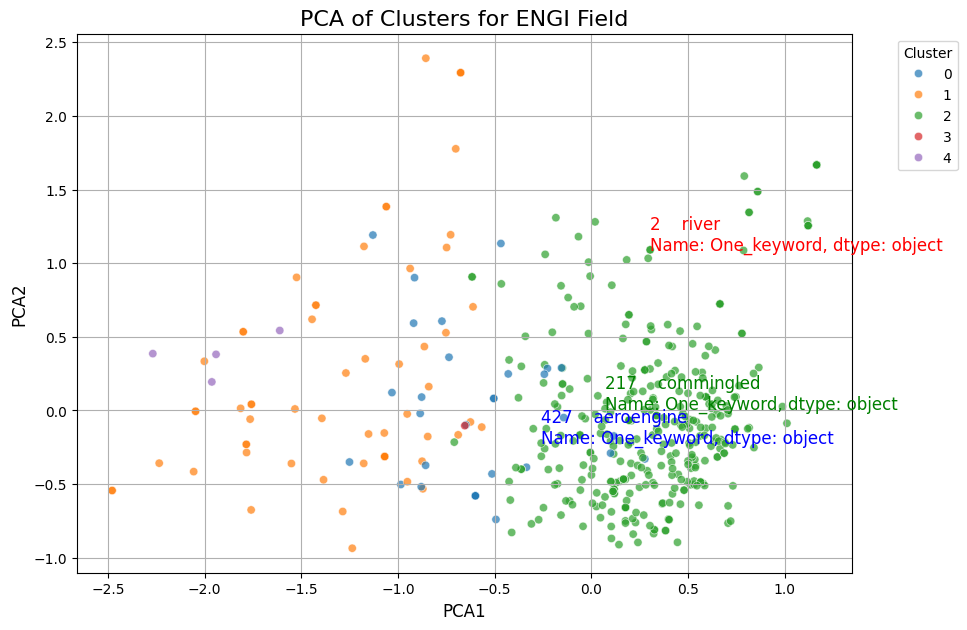

In [143]:
import pandas as pd
import numpy as np
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import seaborn as sns


pca = PCA(n_components=2)
reduced_vectors = pca.fit_transform(vector)

# Add the PCA results to the DataFrame
field_data['PCA1'] = reduced_vectors[:, 0]
field_data['PCA2'] = reduced_vectors[:, 1]

# Plot the clusters
plt.figure(figsize=(10, 7))
sns.scatterplot(
    x='PCA1', 
    y='PCA2', 
    hue='cluster', 
    palette='tab10', 
    data=field_data, 
    legend='full', 
    alpha=0.7
)

# Annotate the selected keywords
plt.text(field_data.loc[largest_cluster_indices[0], 'PCA1'], 
         field_data.loc[largest_cluster_indices[0], 'PCA2'], 
         key1, fontsize=12, color='red')
plt.text(field_data.loc[largest_cluster_indices[int(n/2)], 'PCA1'], 
         field_data.loc[largest_cluster_indices[int(n/2)], 'PCA2'], 
         key2, fontsize=12, color='green')
plt.text(field_data.loc[largest_cluster_indices[-1], 'PCA1'], 
         field_data.loc[largest_cluster_indices[-1], 'PCA2'], 
         key3, fontsize=12, color='blue')

# Customize plot
plt.title('PCA of Clusters for ENGI Field', fontsize=16)
plt.xlabel('PCA1', fontsize=12)
plt.ylabel('PCA2', fontsize=12)
plt.legend(title='Cluster', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(True)
plt.show()

In [157]:
['A','B']

False

In [4]:
"AB,BC".str.contain('AB')

AttributeError: 'str' object has no attribute 'str'